In [26]:
%reload_ext autoreload
%autoreload 2

In [27]:
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

# Collect all image names (before rotation, before thumbnail generation)

In [18]:
stack = 'CHATM3'

In [19]:
# The set of dirs where we should search for image files.
raw_data_dirs = \
{('Ntb', 'raw'): '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb',
('CHAT', 'raw'): '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT',
('AF', 'raw'): '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_AF',
('Ntb', 'thumbnail'): None}

# image_name_to_metainfo_mapping = '%(brain_id)s_slide%(slide_num)d_%(year)s_%(month)s_%(day)s_S%(scene_index)d'

image_name_to_metainfo_re_pattern = '(.*?)_slide([0-9]*?)_([0-9]*?)_([0-9]*?)_([0-9]*?)-S([0-9])'
# image_name_to_metainfo_re_semantics = ['brain_id', 'slide_num', 'year', 'month', 'day', 'scene_index']

# g = re.search(image_name_to_metainfo_re_pattern, img_name)
# groups = g.groups()
# dict(zip(image_name_to_metainfo_re_semantics, groups))

# Specifies how to extract image name from file path.
# The first group returned by re.search is image_name.
input_image_filename_to_imagename_re_pattern_mapping = \
{('Ntb', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/(.*)_.*?_.*?.tif',
 ('CHAT', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/(.*)_.*?_.*?.tif', 
 ('AF', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_AF/(.*)_.*?_.*?.tif', 
}

In [20]:
# The set of dirs where we should search for image files.
raw_data_dirs = \
{('Ntb', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_Ntb',
('CHAT', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_CHAT',
('AF', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_AF',
('Ntb', 'thumbnail'): None}

# image_name_to_metainfo_mapping = '%(brain_id)s_slide%(slide_num)d_%(year)s_%(month)s_%(day)s_S%(scene_index)d'

image_name_to_metainfo_re_pattern = '(.*?)_slide([0-9]*?)_([0-9]*?)_([0-9]*?)_([0-9]*?)-S([0-9])'
# image_name_to_metainfo_re_semantics = ['brain_id', 'slide_num', 'year', 'month', 'day', 'scene_index']

# g = re.search(image_name_to_metainfo_re_pattern, img_name)
# groups = g.groups()
# dict(zip(image_name_to_metainfo_re_semantics, groups))

# Specifies how to extract image name from file path.
# The first group returned by re.search is image_name.
input_image_filename_to_imagename_re_pattern_mapping = \
{('Ntb', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_Ntb/(.*)_.*?_.*?.tif',
 ('CHAT', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_CHAT/(.*)_.*?_.*?.tif', 
 ('AF', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_AF/(.*)_.*?_.*?.tif', 
}

In [21]:
image_names_all_data_dirs_flattened = set([])
image_names_all_data_dirs = {}
for vr, data_dir in raw_data_dirs.iteritems():
    if data_dir is None: continue
    image_names = set([])
    if vr in input_image_filename_to_imagename_re_pattern_mapping:
        for fn in os.listdir(data_dir):
            g = re.search(input_image_filename_to_imagename_re_pattern_mapping[vr], os.path.join(data_dir, fn))
            img_name = g.groups()[0]
            image_names.add(img_name)
            image_names_all_data_dirs_flattened.add(img_name)
    image_names_all_data_dirs[vr] = image_names
    
    
# Make sure the every image has all three channels.
for vr, img_names in image_names_all_data_dirs.iteritems():
    print vr, 'missing:' 
    print image_names_all_data_dirs_flattened - img_names
    print 

('CHAT', 'raw') missing:
set([])

('Ntb', 'raw') missing:
set([])

('AF', 'raw') missing:
set([])



In [22]:
print len(image_names_all_data_dirs_flattened), 'images are found.'

293 images are found.


In [23]:
# _, sections_to_filenames = DataManager.load_sorted_filenames(stack=stack) 
# valid_filenames = [fn for fn in sections_to_filenames.values() if not is_invalid(fn=fn)]
valid_filenames = sorted(list(image_names_all_data_dirs_flattened), key=lambda n: int(n.split('_')[1][5:]))
# Do not need sorted list at this stage. Simply sort by slide number for ease of examination.

# Specify paths of raw data

These are data that have not been rotated to standard orientation.
so they are not stored into the standard location.

In [63]:
image_name_to_filepath_mappings = {
    ('NtbPreRotation', 'raw'): \
     '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/%(image_name)s_lossless_Ntb.tif',
     ('NtbPreRotation', 'thumbnail'): \
     '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_thumbnail_Ntb/%(image_name)s_thumbnail_Ntb.tif',
     ('CHATPreRotation', 'raw'): \
     '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/%(image_name)s_lossless_CHAT.tif',  
    ('NtbPreRotationNormalized', 'thumbnail'): \
 '/media/yuncong/BethandHannah_External1/CHATM2/CHATM2_thumbnail_NtbNormalized/%(image_name)s_thumbnail_NtbNormalized.tif'
}

In [24]:
image_name_to_filepath_mappings = {
    ('Ntb', 'raw'): \
     '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_Ntb/%(image_name)s_lossless_Ntb.tif',
     ('Ntb', 'thumbnail'): \
     '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_Ntb/%(image_name)s_thumbnail_Ntb.tif',
     ('CHAT', 'raw'): \
     '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_CHAT/%(image_name)s_lossless_CHAT.tif',  
    ('NtbNormalized', 'thumbnail'): \
 '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/%(image_name)s_thumbnail_NtbNormalized.tif'
}

# Check image dimensions

In [25]:
# rule_identifier = ('Ntb', 'raw')
rule_identifier = ('CHAT', 'raw')

for fn in valid_filenames:
    raw_fp = image_name_to_filepath_mappings[rule_identifier] % {'image_name': fn}
    raw_dim = identify_shape(raw_fp)
    print fn, raw_dim

CHATM3_slide01_2018_02_17-S2 [9477, 20506]
CHATM3_slide01_2018_02_17-S3 [11317, 20536]
CHATM3_slide01_2018_02_17-S1 [9453, 18683]
CHATM3_slide02_2018_02_18-S1 [11290, 20530]
CHATM3_slide02_2018_02_18-S3 [13152, 20531]
CHATM3_slide02_2018_02_18-S2 [11299, 20534]
CHATM3_slide03_2018_02_18-S1 [13154, 14984]
CHATM3_slide03_2018_02_18-S2 [14980, 22370]
CHATM3_slide03_2018_02_18-S3 [13176, 22363]
CHATM3_slide04_2018_02_17-S2 [13156, 22357]
CHATM3_slide04_2018_02_17-S3 [14997, 22356]
CHATM3_slide04_2018_02_17-S1 [11315, 22376]
CHATM3_slide05_2018_02_17-S2 [14992, 24234]
CHATM3_slide05_2018_02_17-S1 [14999, 22394]
CHATM3_slide06_2018_02_17-S2 [15007, 24219]
CHATM3_slide06_2018_02_17-S1 [13163, 22366]
CHATM3_slide07_2018_02_18-S1 [15009, 26074]
CHATM3_slide07_2018_02_18-S2 [16845, 24225]
CHATM3_slide07_2018_02_18-S3 [15027, 26071]
CHATM3_slide08_2018_02_18-S3 [15004, 26077]
CHATM3_slide08_2018_02_18-S2 [15004, 26067]
CHATM3_slide08_2018_02_18-S1 [14989, 24205]
CHATM3_slide09_2018_02_18-S2 [1499

KeyboardInterrupt: 

# Generate thumbnails

In [9]:
thumbnail_downscale_factor = 32

In [ ]:
for img_name in valid_filenames:
# for img_name in ['CHATM3_slide69_2018_02_19-S3']:

    t = time.time()

    in_fp = image_name_to_filepath_mappings[('Ntb', 'raw')] % {'image_name': img_name}
    out_fp = image_name_to_filepath_mappings[('Ntb', 'thumbnail')] % {'image_name': img_name}
    create_parent_dir_if_not_exists(out_fp)
    
    img = imread(in_fp)
    imsave(out_fp, img[::thumbnail_downscale_factor, ::thumbnail_downscale_factor])

    # Alternative: ImageMagick introduces an artificial noisy stripe in the output image.
#     cmd = 'convert %(in_fp)s -scale 3.125%% %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp}
#     execute_command(cmd)
        
    sys.stderr.write("Rescale: %.2f seconds.\n" % (time.time() - t)) # ~20s / image

/usr/local/lib/python2.7/dist-packages/skimage/external/tifffile/tifffile.py:2543: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return numpy.fromstring(x, typecode)
/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S2_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 4.38 seconds.
/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S3_thumbnail_Ntb.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
Rescale: 6.95 seconds.
Rescale: 8.87 seconds.
/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_20

In [ ]:
for img_name in valid_filenames:
# for img_name in ['CHATM3_slide69_2018_02_19-S3']:

    t = time.time()

    in_fp = image_name_to_filepath_mappings[('Ntb', 'thumbnail')] % {'image_name': img_name}
    out_fp = image_name_to_filepath_mappings[('NtbNormalized', 'thumbnail')] % {'image_name': img_name}
    create_parent_dir_if_not_exists(out_fp)
        
    cmd = """convert "%(in_fp)s" -normalize -depth 8 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
    execute_command(cmd)
    
    sys.stderr.write("Intensity normalize: %.2f seconds." % (time.time() - t))

# Rotate

In [27]:
# for rule_identifier in [('Ntb', 'raw'), ('CHAT', 'raw')]:
#     version, resol = rule_identifier

#     for img_name in valid_filenames:   
#         in_fp = input_image_filename_mapping[rule_identifier] % {'image_name': img_name}
#         out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=resol, version=version+'PreOrientationCorrection', fn=img_name)
#         create_parent_dir_if_not_exists(out_fp)
#     #     print in_fp, out_fp
#         execute_command('ln -s %(in_fp)s %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp})
#     #     upload_to_s3(out_fp)

In [13]:
if stack == 'CHATM2':
    image_filename_to_orientation_mapping = \
    {
        img_name: 'top_posterior_left_ventral' for img_name in valid_filenames
    }
elif stack == 'CHATM3':
    image_filename_to_orientation_mapping = {}
    for img_name in valid_filenames:
        if img_name == 'CHATM3_slide07_2018_02_18-S1':
            image_filename_to_orientation_mapping[img_name] = 'top_posterior_left_ventral'
        else:
            image_filename_to_orientation_mapping[img_name] = 'top_anterior_left_dorsal'

In [25]:
# # Paths to store the actual image data (not symbolic links).

# output_image_filename_mapping = \
# {('Ntb', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3_rotated_YC/CHATM3_raw_Ntb/%(image_name)s_raw_Ntb.tif',
#  ('CHAT', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3_rotated_YC/CHATM3_raw_CHAT/%(image_name)s_raw_CHAT.tif',
# }

In [15]:
for rule_identifier in [('NtbNormalized', 'thumbnail')]:

    version, resol = rule_identifier

    for img_name in valid_filenames:

        t = time.time()

        in_fp = image_name_to_filepath_mappings[rule_identifier] % {'image_name': img_name}
    
        out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=resol, version=version, fn=img_name)
        create_parent_dir_if_not_exists(out_fp)

        # Reference: http://www.imagemagick.org/Usage/warping/#flip
        orientation = image_filename_to_orientation_mapping[img_name]
    
        if orientation == 'top_anterior_left_dorsal':
            init_rotate = '-transpose'
        elif orientation == 'top_anterior_left_ventral':
            init_rotate = '-rotate 90'
        elif orientation == 'top_posterior_left_ventral':
            init_rotate = '-transverse'
        else:
            init_rotate = ''
    
        if init_rotate == '':
            execute_command('rm -f %(out_fp)s; ln -s %(in_fp)s %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp})
        else:
            cmd1 = """convert "%(in_fp)s" %(init_rotate)s "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp, 'init_rotate': init_rotate}
            execute_command(cmd1)
        
        sys.stderr.write("Rotate: %.2f seconds." % (time.time() - t))

convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.10 seconds.Rotate: 0.09 seconds.Rotate: 0.10 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.10 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.10 seconds.Rotate: 0.09 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.10 seconds.Rotate: 0.11 seconds.Rotate: 0.10 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormaliz

Rotate: 0.10 seconds.Rotate: 0.10 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.10 seconds.Rotate: 0.10 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.10 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.Rotate: 0.10 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormaliz

Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.10 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.11 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormaliz

Rotate: 0.12 seconds.Rotate: 0.11 seconds.Rotate: 0.11 seconds.

convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0


Rotate: 0.11 seconds.Rotate: 0.12 seconds.Rotate: 0.11 seconds.

convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.11 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide43_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide43_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.17 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide61_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide61_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S3_thumbnail_NtbNormalized.tif" 

Rotate: 0.15 seconds.Rotate: 0.17 seconds.


0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.17 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.17 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.17 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.17 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S3_thumbnail_NtbNormalized.tif" 

Rotate: 0.17 seconds.Rotate: 0.17 seconds.


0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.17 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.23 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.16 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.21 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.15 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.15 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.14 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.14 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.13 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S2_thumbnail_NtbNormalized.tif" 


Rotate: 0.12 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S1_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S1_thumbnail_NtbNormalized.tif" 


Rotate: 0.13 seconds.Rotate: 0.12 seconds.

0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S2_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
convert "/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S3_thumbnail_NtbNormalized.tif" -transpose "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S3_thumbnail_NtbNormalized.tif" 


Rotate: 0.11 seconds.Rotate: 0.12 seconds.

0


Rotate: 0.11 seconds.

# Check image shape (after rotation)

In [70]:
rule_identifier = ('Ntb', 'raw')
# rule_identifier = ('NtbNormalized', 'thumbnail')
version, resol = rule_identifier

for img_name in valid_filenames[:1]:
    fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=resol, version=version, fn=img_name)
    dim = identify_shape(fp)
    print fn, dim

CHATM2_slide108_2018_02_13-S3 [20532, 27925]


In [71]:
# rule_identifier = ('Ntb', 'raw')
rule_identifier = ('NtbNormalized', 'thumbnail')
version, resol = rule_identifier

for img_name in valid_filenames[:1]:
    fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=resol, version=version, fn=img_name)
    dim = identify_shape(fp)
    print fn, dim

CHATM2_slide108_2018_02_13-S3 [873, 642]


In [29]:
# for rule_identifier in [('Ntb', 'raw'), ('CHAT', 'raw')]:

#     version, resol = rule_identifier

#     for img_name in valid_filenames[:1]:

#         t = time.time()

#         in_fp = input_image_filename_mapping[rule_identifier] % {'image_name': img_name}

#         out_raw_fp = output_image_filename_mapping[rule_identifier] % {'image_name': img_name}
#         create_parent_dir_if_not_exists(out_raw_fp)
    
#         out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol=resol, version=version, fn=img_name)
#         create_parent_dir_if_not_exists(out_fp)

#         # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.

#     #     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
#     #         {'fn':img_name, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

#     # Reference: http://www.imagemagick.org/Usage/warping/#flip

#         orientation = image_filename_to_orientation_mapping[img_name]
    
#         if orientation == 'top_anterior_left_dorsal':
#             init_rotate = '-transpose'
#         elif orientation == 'top_anterior_left_ventral':
#             init_rotate = '-rotate 90'
#         elif orientation == 'top_posterior_left_ventral':
#             init_rotate = '-transverse'
#         else:
#             init_rotate = ''
    
#         if init_rotate == '':
#             execute_command('rm -f %(out_fp)s; ln -s %(in_fp)s %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp})
#         else:
            
#             cmd1 = """convert "%(in_fp)s" %(init_rotate)s "%(out_raw_fp)s" """ % {'in_fp': in_fp, 'out_raw_fp': out_raw_fp, 'init_rotate': init_rotate}
#             execute_command(cmd1)
#             cmd2 = 'rm -f %(out_fp)s; ln -s %(out_raw_fp)s %(out_fp)s' % {'out_raw_fp': out_raw_fp, 'out_fp': out_fp}
#             execute_command(cmd2)          
        
#         sys.stderr.write("Rotate: %.2f seconds." % (time.time() - t))

# Sort image files

In [58]:
def generate_sorted_filelist(condition_list_fp, ordering_rule_fp,
                            position_to_scene_index_map_3sections,
                            position_to_scene_index_map_2sections):
    import re
    
    # Parse conditon list file.
    section_conditions = defaultdict(dict)
    with open(condition_list_fp, 'r') as f:
        for line in f.readlines():
            g = re.search('Slide([0-9]*?), (.*) section: (.*)', line.strip())
            slide_num, position, condition = g.groups()
            assert condition in ['good', 'bad', 'not used', 'not scanned'], condition
            assert position in ['left', 'middle', 'right'], position
            assert position not in section_conditions[int(slide_num)], 'Conflict %d %s' % (slide_num, position)
            section_conditions[int(slide_num)][position] = condition
    section_conditions.default_factory = None
        
    # Check for slides with missing information.

    smin = np.min(section_conditions.keys())
    smax = np.max(section_conditions.keys())
    slides_missing_info = set(range(smin, smax+1)) - set(section_conditions.keys())

    if len(slides_missing_info) > 0:
        print 'These slides are missing section condition information: %s' % slides_missing_info
        
    # Parse order rule file.
    ordering_rules = {}
    with open(ordering_rule_fp, 'r') as f:
        for line in f.readlines():
            g = re.search('Slide (.*?): (.*)', line.strip())
            slide_range, rule = g.groups()
            if '-' in slide_range:
                start, end = map(int, slide_range.split('-'))
            else:
                start = int(slide_range)
                end = int(slide_range)
            ordering_rules[(start, end)] = rule

    # Sort position
    sorted_list = []
    for (start, end), rule in ordering_rules.iteritems():
        if rule == 'InterleaveL2R':
            for slide_num in xrange(start, end+1, 2):
                conditions_slide1 = section_conditions[slide_num]
                conditions_slide2 = section_conditions[slide_num+1]
                if set(conditions_slide1.keys()) == {'left', 'middle', 'right'} \
                    and set(conditions_slide2.keys()) == {'left', 'middle', 'right'} :
                    sublist = [(slide_num, position_to_scene_index_map_3sections['left']), \
                               (slide_num+1, position_to_scene_index_map_3sections['left']), \
                               (slide_num, position_to_scene_index_map_3sections['middle']), \
                               (slide_num+1, position_to_scene_index_map_3sections['middle']), \
                               (slide_num, position_to_scene_index_map_3sections['right']), \
                               (slide_num+1, position_to_scene_index_map_3sections['right'])
                              ]
                elif set(conditions_slide1.keys()) == {'left', 'right'} \
                    and set(conditions_slide2.keys()) == {'left', 'right'}:
                    sublist = [(slide_num, position_to_scene_index_map_2sections['left']),\
                               (slide_num+1, position_to_scene_index_map_2sections['left']), \
                       (slide_num, position_to_scene_index_map_2sections['right']), \
                               (slide_num+1, position_to_scene_index_map_2sections['right'])
                      ]
                elif set(conditions_slide1.keys()) == {'left', 'middle', 'right'} \
                    and set(conditions_slide2.keys()) == {'left', 'right'}:
                    sublist = [(slide_num, position_to_scene_index_map_2sections['left']),\
                               (slide_num+1, position_to_scene_index_map_2sections['left']), \
                       (slide_num, position_to_scene_index_map_3sections['middle']), \
                               (slide_num+1, position_to_scene_index_map_2sections['right']), \
                               (slide_num, position_to_scene_index_map_3sections['right'])
                      ]
                else:
                    print slide_num, conditions_slide1, slide_num + 1, conditions_slide2
                    raise

                sorted_list += sublist

        elif rule == 'SequentialL2R':
            for slide_num in xrange(start, end+1, 1):
                conditions_slide1 = section_conditions[slide_num]
                if 'left' in conditions_slide1 and 'middle' in conditions_slide1 and 'right' in conditions_slide1:
                    sublist = [(slide_num, position_to_scene_index_map_3sections['left']), 
                               (slide_num, position_to_scene_index_map_3sections['middle']), 
                               (slide_num, position_to_scene_index_map_3sections['right'])]
                elif 'left' in conditions_slide1 and 'right' in conditions_slide1:
                    sublist = [(slide_num, position_to_scene_index_map_2sections['left']), 
                               (slide_num, position_to_scene_index_map_2sections['right'])]
                else:
                    print slide_num, conditions_slide1
                    raise

                sorted_list += sublist
        else:
            raise
            
    return sorted_list

In [59]:
condition_list_fp = '/media/yuncong/BethandHannah_External1/CHATM2_condition_list.txt'
ordering_rule_fp = '/media/yuncong/BethandHannah_External1/CHATM2_ordering_rule_YC.txt'

# condition_list_fp = '/media/yuncong/BethandHannah_External2/CHATM3_condition_list.txt'
# ordering_rule_fp = '/media/yuncong/BethandHannah_External2/CHATM3_ordering_rule_YC.txt'

position_to_scene_index_map_3sections = {'left': 1, 'middle': 2, 'right': 3}
position_to_scene_index_map_2sections = {'left': 1, 'right': 2}

sorted_list = generate_sorted_filelist(condition_list_fp, ordering_rule_fp,
                                      position_to_scene_index_map_3sections,
                                      position_to_scene_index_map_2sections)

sorted_filename_list = []

slide_scene_to_image_name_mapping = {}

for img_name in image_names_all_data_dirs_flattened:
    g = re.search(image_name_to_metainfo_re_pattern, img_name)
    if g is not None:
        groups = g.groups()
        slide_num = int(groups[1])
        scene_index = int(groups[5])
    slide_scene_to_image_name_mapping[(slide_num, scene_index)] = img_name

for ss in sorted_list:
    
    if ss not in slide_scene_to_image_name_mapping:
        fn = 'Placeholder'
    else:
        fn = slide_scene_to_image_name_mapping[ss]
    sorted_filename_list.append(fn)
    
out_sorted_image_names_fp = DataManager.get_sorted_filenames_filename(stack=stack)

with open(out_sorted_image_names_fp, 'w') as f:
    for sec, fn in enumerate(sorted_filename_list):
        f.write('%s %03d\n' % (fn, sec + 1))
        
upload_to_s3(out_sorted_image_names_fp)

aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_sorted_filenames.txt" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM2/CHATM2_sorted_filenames.txt"
0


# Link raw files to standard locations

In [66]:
for rule_identifier in [('Ntb', 'raw'), ('CHAT', 'raw')]:
    version, resol = rule_identifier

    for img_name in valid_filenames:
        in_fp = image_name_to_filepath_mappings[rule_identifier] % {'image_name': img_name}
        out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version=version, resol=resol, fn=img_name)
        create_parent_dir_if_not_exists(out_fp)
    #     print in_fp, out_fp
        execute_command('rm %(out_fp)s; ln -s %(in_fp)s %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp})
    #     upload_to_s3(out_fp)

ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide01_2018_01_18-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide01_2018_01_18-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide01_2018_01_18-S1_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide01_2018_01_18-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide01_2018_01_18-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide01_2018_01_18-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide02_2018_01_18-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide02_2018_01_18-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide02_2018_0

1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide16_2018_01_18-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide16_2018_01_18-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide16_2018_01_18-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide16_2018_01_18-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide17_2018_01_18-S1_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide17_2018_01_18-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide17_2018_01_18-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide17_2018_01_18-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide17_2018

1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide32_2018_01_20-S1_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide32_2018_01_20-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide32_2018_01_20-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide32_2018_01_20-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide32_2018_01_20-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide32_2018_01_20-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide33_2018_01_20-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide33_2018_01_20-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide33_2018

1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide49_2018_01_22-S1_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide49_2018_01_22-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide49_2018_01_22-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide49_2018_01_22-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide50_2018_01_22-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide50_2018_01_22-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide50_2018_01_22-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide50_2018_01_22-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide50_2018

1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide72_2018_02_14-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide72_2018_02_14-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide74_2018_02_14-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide74_2018_02_14-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide74_2018_02_14-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide74_2018_02_14-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide74_2018_02_14-S1_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide74_2018_02_14-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide76_2018

1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S1_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S2_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slide106_2018_02_13-S3_lossless_Ntb.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_Ntb/CHATM2_slide106_2018_02_13-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb/CHATM2_slid

0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide13_2018_01_19-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide13_2018_01_19-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide13_2018_01_19-S1_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide13_2018_01_19-S1_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide14_2018_01_18-S2_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide14_2018_01_18-S2_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide14_2018_01_18-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide14_2018_01_18-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CH

0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide29_2018_01_18-S2_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide29_2018_01_18-S2_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide29_2018_01_18-S1_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide29_2018_01_18-S1_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide29_2018_01_18-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide29_2018_01_18-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide30_2018_01_18-S1_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide30_2018_01_18-S1_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CH

0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide42_2018_01_22-S1_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide42_2018_01_22-S1_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide42_2018_01_22-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide42_2018_01_22-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide43_2018_01_22-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide43_2018_01_22-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide43_2018_01_22-S2_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide43_2018_01_22-S2_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CH

ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide55_2018_01_22-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide55_2018_01_22-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide56_2018_01_22-S1_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide56_2018_01_22-S1_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide56_2018_01_22-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide56_2018_01_22-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide56_2018_01_22-S2_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide56_2018_01_22-S2_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHAT

0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide80_2018_02_14-S1_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide80_2018_02_14-S1_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide82_2018_02_14-S2_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide82_2018_02_14-S2_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide82_2018_02_14-S3_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide82_2018_02_14-S3_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CHATM2_slide82_2018_02_14-S1_lossless_CHAT.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_raw_CHAT/CHATM2_slide82_2018_02_14-S1_raw_CHAT.tif
0
ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT/CH

# Generate thumbnails

In [ ]:
for img_name in valid_filenames:

    t = time.time()

    raw_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='raw', fn=img_name)
    tb_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=img_name)
    create_parent_dir_if_not_exists(tb_fp)
    
    cmd = 'convert %(raw_fp)s -scale 3.125%% %(tb_fp)s' % {'raw_fp': raw_fp, 'tb_fp': tb_fp}
    execute_command(cmd)

    sys.stderr.write("Rescale: %.2f seconds." % (time.time() - t))

In [30]:
for img_name in valid_filenames:

    t = time.time()

    raw_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='raw', fn=img_name)
    tb_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=img_name)
    create_parent_dir_if_not_exists(tb_fp)
    
    cmd = 'convert %(raw_fp)s -scale 3.125%% %(tb_fp)s' % {'raw_fp': raw_fp, 'tb_fp': tb_fp}
    execute_command(cmd)

    sys.stderr.write("Rescale: %.2f seconds." % (time.time() - t))

convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide01_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S1_thumbnail_Ntb.tif
0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide02_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 4.22 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide01_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 5.13 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide02_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 4.72 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide01_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 7.09 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide02_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 5.22 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide03_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 6.09 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide04_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 4.65 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide03_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 6.71 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide04_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 9.69 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide03_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 6.49 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide04_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 6.71 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide05_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide05_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 7.80 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide06_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 7.57 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide05_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide05_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 8.76 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide06_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 10.33 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide07_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide07_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 8.15 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide08_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide08_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 8.92 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide07_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide07_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 8.32 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide08_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide08_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 9.70 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide07_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide07_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 11.61 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide08_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide08_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 9.11 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide09_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide09_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 9.07 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide10_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide10_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 8.42 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide09_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide09_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 10.68 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide10_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide10_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 11.76 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide09_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide09_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 9.10 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide10_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide10_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 8.37 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide11_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 12.72 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide12_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide12_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 13.68 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide11_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 11.54 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide12_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide12_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 13.57 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide11_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 11.54 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide12_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide12_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 14.04 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide13_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 12.44 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide14_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 12.97 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide13_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 13.95 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide14_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 12.37 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide13_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 13.05 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide14_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 12.39 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide16_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide16_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 13.99 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide15_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide15_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 12.39 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide16_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide16_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 15.30 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide15_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide15_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 14.11 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide17_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide17_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 14.57 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide18_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide18_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 14.53 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide17_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide17_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 13.90 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide18_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide18_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 15.45 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide17_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide17_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 15.13 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide18_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide18_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 13.87 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide19_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide19_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 15.07 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide20_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide20_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 15.18 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide19_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide19_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 15.58 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide19_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide19_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 15.56 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide20_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide20_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 17.47 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide21_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide21_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 15.61 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide22_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide22_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 15.86 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide21_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide21_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 16.46 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide22_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide22_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 18.08 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide21_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide21_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 18.64 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide22_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide22_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 14.23 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide23_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide23_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 18.58 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide24_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide24_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 16.58 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide23_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide23_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 17.36 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide24_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide24_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 14.30 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide23_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide23_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 16.76 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide24_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide24_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 20.94 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide25_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 18.50 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide26_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide26_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 16.06 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide25_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 18.65 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide26_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide26_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 23.13 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide25_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 18.28 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide26_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide26_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 19.62 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide27_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide27_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 22.34 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide28_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide28_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 21.65 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide27_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide27_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 16.71 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide28_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide28_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 20.58 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide27_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide27_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 20.37 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide28_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide28_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 19.49 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide29_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide29_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 20.53 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide30_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide30_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 19.28 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide29_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide29_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 21.92 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide30_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide30_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 21.98 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide29_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide29_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 23.21 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide30_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide30_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 20.72 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide32_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide32_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 22.01 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide31_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide31_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 22.90 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide32_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide32_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 23.30 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide31_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide31_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 22.97 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide33_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 23.95 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide34_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 23.15 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide33_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 22.47 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide34_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 21.08 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide33_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 23.56 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide34_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 21.55 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide35_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide35_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 21.94 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide36_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide36_2018_02_17-S1_thumbnail_Ntb.tif


Rescale: 30.97 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide35_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide35_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 32.82 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide36_2018_02_17-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide36_2018_02_17-S2_thumbnail_Ntb.tif


Rescale: 30.53 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide35_2018_02_17-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide35_2018_02_17-S3_thumbnail_Ntb.tif


Rescale: 35.89 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide37_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide37_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 31.81 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide38_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide38_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 33.68 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide37_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide37_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 31.35 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide38_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide38_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 32.71 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide37_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide37_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 32.94 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide38_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide38_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 33.39 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide39_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 30.52 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide40_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 31.45 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide39_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 37.32 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide40_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 35.17 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide39_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 24.35 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide40_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 30.93 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide41_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide41_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 38.45 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide42_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide42_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 34.19 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide41_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide41_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 32.58 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide42_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide42_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 27.88 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide41_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide41_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 35.39 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide42_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide42_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 26.78 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide44_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 36.73 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide43_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide43_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 26.73 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide44_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 26.59 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide44_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 29.35 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide45_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide45_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 27.67 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide45_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide45_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 30.40 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide46_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide46_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 32.93 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide45_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide45_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 28.39 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide46_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide46_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 31.14 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide47_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide47_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 28.99 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide48_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide48_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 25.91 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide47_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide47_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 37.92 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide48_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide48_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 23.35 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide47_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide47_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 37.41 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide48_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide48_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 30.74 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide49_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide49_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 39.77 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 35.62 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide49_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide49_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 37.38 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 36.14 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide49_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide49_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 40.61 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 37.84 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide51_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 43.01 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide52_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide52_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 32.30 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide51_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 31.87 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide51_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 35.69 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide52_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide52_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 42.32 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide53_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide53_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 35.10 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide54_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide54_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 39.57 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide53_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide53_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 42.87 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide54_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide54_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 33.31 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide53_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide53_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 37.84 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide54_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide54_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 37.66 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide56_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide56_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 43.33 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide55_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 41.60 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide56_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide56_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 29.98 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide55_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 41.83 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide56_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide56_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 40.68 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide55_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 55.31 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide57_2018_02_18-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide57_2018_02_18-S1_thumbnail_Ntb.tif


Rescale: 40.16 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide58_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide58_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 42.01 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide57_2018_02_18-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide57_2018_02_18-S2_thumbnail_Ntb.tif


Rescale: 41.49 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide58_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide58_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 50.51 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide57_2018_02_18-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide57_2018_02_18-S3_thumbnail_Ntb.tif


Rescale: 37.59 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide58_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide58_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 41.41 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide59_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide59_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 41.74 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide60_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide60_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 40.20 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide59_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide59_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 35.60 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide60_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide60_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 40.53 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide59_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide59_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 40.25 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide60_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide60_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 46.10 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide61_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide61_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 43.35 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide62_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 41.27 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide62_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 45.61 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide62_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 40.47 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide63_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 42.43 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide64_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide64_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 45.44 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide63_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 44.79 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide64_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide64_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 44.63 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide63_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 41.57 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide64_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide64_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 41.12 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide65_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide65_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 46.19 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide66_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 42.39 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide66_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 42.43 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide65_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide65_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 38.96 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide66_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 50.66 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide67_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide67_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 40.11 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide68_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 39.53 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide67_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide67_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 44.34 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide68_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 46.05 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide67_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide67_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 42.66 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide68_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 48.73 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide69_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide69_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 42.32 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide70_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide70_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 45.83 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide69_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide69_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 39.87 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide70_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide70_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 39.27 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide69_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide69_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 40.09 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide70_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide70_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 42.98 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide71_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 49.65 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide72_2018_02_19-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide72_2018_02_19-S1_thumbnail_Ntb.tif


Rescale: 38.75 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide71_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 42.12 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide72_2018_02_19-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide72_2018_02_19-S2_thumbnail_Ntb.tif


Rescale: 48.81 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide71_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 50.92 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide72_2018_02_19-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide72_2018_02_19-S3_thumbnail_Ntb.tif


Rescale: 46.68 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide73_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide73_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 48.04 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide73_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide73_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 41.49 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide73_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide73_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 35.02 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide75_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide75_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 45.28 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide75_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide75_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 46.84 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide75_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide75_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 50.40 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide77_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide77_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 54.08 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide77_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide77_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 46.59 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide77_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide77_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 47.84 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide79_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide79_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 45.76 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide79_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide79_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 48.56 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide79_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide79_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 45.48 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide83_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide83_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 46.61 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide83_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide83_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 44.35 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide85_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide85_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 50.05 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide85_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide85_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 43.64 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide85_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide85_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 51.44 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide87_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide87_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 63.85 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide87_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide87_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 42.77 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide87_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide87_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 50.37 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide89_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide89_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 45.32 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide89_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide89_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 47.67 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide91_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide91_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 52.80 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide91_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide91_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 43.65 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide93_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide93_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 39.71 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide93_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide93_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 45.68 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide93_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide93_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 42.18 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide95_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 44.28 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide95_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 33.70 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide95_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 38.91 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide97_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 36.16 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide97_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 32.42 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide97_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 34.92 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide99_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide99_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 39.22 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide99_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide99_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 36.14 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide99_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide99_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 31.96 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide101_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 38.49 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide101_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 36.29 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide101_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 34.78 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide103_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide103_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 37.85 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide103_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide103_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 30.63 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide103_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide103_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 35.72 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide105_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide105_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 34.83 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide105_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide105_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 33.54 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide105_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide105_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 31.12 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide107_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 34.56 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide107_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 34.01 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide107_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 28.15 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide109_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide109_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 33.32 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide109_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide109_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 31.95 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide111_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 31.23 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide111_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 27.43 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide111_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 25.44 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide113_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide113_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 28.28 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide113_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide113_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 26.61 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide113_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide113_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 25.27 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide115_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide115_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 29.11 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide115_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide115_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 27.67 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide115_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide115_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 23.01 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide117_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 26.96 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide117_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 27.65 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide117_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 25.29 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide119_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide119_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 25.53 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide119_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide119_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 26.30 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide119_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide119_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 24.21 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide121_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide121_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 21.72 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide121_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide121_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 23.70 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide121_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide121_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 24.78 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide123_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 24.32 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide123_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 22.35 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide123_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 21.39 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide125_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide125_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 23.55 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide125_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide125_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 23.02 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide125_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide125_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 22.90 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide127_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide127_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 22.69 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide127_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide127_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 22.72 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide127_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide127_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 20.74 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide129_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 20.06 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide129_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 19.89 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide129_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 19.05 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide131_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide131_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 21.53 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide131_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide131_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 22.25 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide131_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide131_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 21.48 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide133_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide133_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 20.96 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide133_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide133_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 20.17 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide133_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide133_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 17.88 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide135_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide135_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 19.95 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide135_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide135_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 19.04 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide135_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide135_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 19.23 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide137_2018_01_26-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide137_2018_01_26-S1_thumbnail_Ntb.tif


Rescale: 18.06 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide137_2018_01_26-S2_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide137_2018_01_26-S2_thumbnail_Ntb.tif


Rescale: 13.85 seconds.

0
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide137_2018_01_26-S3_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide137_2018_01_26-S3_thumbnail_Ntb.tif


Rescale: 19.09 seconds.

0


Rescale: 13.64 seconds.

# Intensity normalize fluorescent images (thumbnails)

In [32]:
for img_name in valid_filenames:

    t = time.time()

    in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=img_name)
    out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbNormalized', resol='thumbnail', fn=img_name)
    create_parent_dir_if_not_exists(tb_fp)
        
    cmd = """convert "%(in_fp)s" -normalize -depth 8 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
    execute_command(cmd)
    
    upload_to_s3(out_fp)
    sys.stderr.write("Intensity normalize: %.2f seconds." % (time.time() - t))

convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb

Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.64 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.68 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.62 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide02_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.62 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.65 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.69 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.67 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide04_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide05_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.25 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.65 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide05_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide05_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.67 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide07_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.68 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide08_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.69 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide07_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.25 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide08_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.68 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide07_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide08_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide08_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide09_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide10_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide09_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.69 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide10_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide09_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide10_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide12_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.68 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide12_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide12_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide12_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide14_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide16_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide15_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide16_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide15_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide15_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide17_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide18_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide17_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.70 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide18_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide17_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.94 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide18_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide19_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 2.64 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide20_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide19_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide19_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide20_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.72 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide21_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide22_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.91 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide21_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.72 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide22_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide21_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide21_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide22_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.36 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide23_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide24_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide23_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide24_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide23_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide23_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide24_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide24_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide26_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide26_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide25_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide26_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide27_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide28_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide27_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide28_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide27_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide28_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.62 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide29_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide30_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide29_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide30_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide29_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide29_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide30_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide30_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.74 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide32_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide31_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide32_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide32_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide31_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide31_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide33_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.72 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide35_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide36_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide35_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide36_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide36_2018_02_17-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide35_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide35_2018_02_17-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide37_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide38_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.74 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide37_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide38_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide37_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.96 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide38_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide38_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide40_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide41_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide42_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide41_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide42_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide41_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide41_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide42_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide42_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide43_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide43_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide43_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide43_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide45_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide45_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide46_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide45_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide45_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide46_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide46_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide47_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide48_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide47_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide48_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide47_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide48_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide48_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide49_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide49_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide49_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide49_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide52_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide52_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide53_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide54_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide53_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide54_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide53_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide53_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide54_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide54_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide56_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.91 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide56_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide56_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide55_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide57_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide58_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide57_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide58_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide57_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide57_2018_02_18-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide58_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide59_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide60_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide59_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide60_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide59_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide59_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.92 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide60_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide60_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide61_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide61_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide61_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide61_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.90 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.93 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide62_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.03 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide64_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide64_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.92 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide63_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide64_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide65_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.92 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide65_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide65_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.90 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide67_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide67_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide67_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide67_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide68_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide69_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide70_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide69_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide70_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide69_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide69_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide70_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide70_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.95 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide72_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide72_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide72_2018_02_19-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.90 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide73_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide73_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide73_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide75_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.93 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide75_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.90 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide75_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide75_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide77_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.91 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide77_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide77_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide79_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide79_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.90 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide79_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide79_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide83_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide83_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide85_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.91 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide85_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide85_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide85_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 2.06 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide87_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.94 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide87_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide87_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide87_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide89_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.91 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide89_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide89_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide91_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.44 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide91_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide91_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.91 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide93_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide93_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide93_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide95_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide99_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 2.16 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide99_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 1.32 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide99_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide99_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide101_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide103_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide103_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide103_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.91 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide105_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide105_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.89 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide105_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0


Intensity normalize: 1.19 seconds.

aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S3_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.99 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide109_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.88 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide109_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide109_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide113_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.87 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide113_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide113_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.95 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide115_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide115_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide115_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide117_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.85 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide119_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide119_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.86 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide119_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide119_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.83 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide121_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide121_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide121_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide123_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide123_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide123_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide123_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide125_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide125_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide125_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide127_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide127_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.78 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide127_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.80 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide129_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide131_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.77 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide131_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.82 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide131_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide131_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide133_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.79 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide133_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide133_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide133_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.84 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide135_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.73 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide135_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.71 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide135_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.81 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide137_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S1_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.76 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide137_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S2_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.75 seconds.

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide137_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide137_2018_01_26-S3_thumbnail_NtbNormalized.tif"


Intensity normalize: 0.72 seconds.

0


Intensity normalize: 0.78 seconds.

In [9]:
condition_list_fp = '/media/yuncong/BethandHannah_External1/CHATM2_condition_list.txt'
ordering_rule_fp = '/media/yuncong/BethandHannah_External1/CHATM2_ordering_rule_YC.txt'

In [10]:
raw_data_dirs = \
{('Ntb', 'raw'): '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_Ntb/',
('CHAT', 'raw'): '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_CHAT/',
('AF', 'raw'): '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_AF/',
('Ntb', 'thumbnail'): None
}

In [11]:
input_image_filename_mapping = \
{('Ntb', 'thumbnail'): None,
 ('Ntb', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_Ntb/%(image_name)s_lossless_Ntb.tif',
 ('CHAT', 'thumbnail'): None,
 ('CHAT', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_CHAT/%(image_name)s_lossless_CHAT.tif', 
}

In [12]:
# The first group returned by re.search is image_name.

input_image_filename_to_imagename_re_pattern_mapping = \
{('Ntb', 'thumbnail'): None,
 ('Ntb', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_Ntb/(.*)_.*?_.*?.tif',
 ('CHAT', 'thumbnail'): None,
 ('CHAT', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_CHAT/(.*)_.*?_.*?.tif', 
 ('AF', 'raw'): \
 '/media/yuncong/BethandHannah_External1/CHATM2_rotated/CHATM2_lossless_AF/(.*)_.*?_.*?.tif', 
}

In [6]:
condition_list_fp = '/media/yuncong/BethandHannah_External2/CHATM3_condition_list.txt'
ordering_rule_fp = '/media/yuncong/BethandHannah_External2/CHATM3_ordering_rule_YC.txt'

In [7]:
# raw_data_dirs = \
# {('Ntb', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb',
# ('CHAT', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_CHAT',
# ('AF', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_AF',
# ('Ntb', 'thumbnail'): '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb_Thumbnail/'}

raw_data_dirs = \
{('Ntb', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_Ntb',
('CHAT', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_CHAT',
('AF', 'raw'): '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_raw_AF',
('Ntb', 'thumbnail'): None}

In [20]:
init_rotate = '-flip -rotate 270'
# init_rotate = ''

In [8]:
input_image_filename_mapping = \
{('Ntb', 'thumbnail'): \
 '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb_Thumbnail/%(image_name)s_lossless_Ntb.tif_sml.tif_rotate.tif',
 ('Ntb', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/%(image_name)s_lossless_Ntb.tif_rotate.tif',
 ('CHAT', 'thumbnail'): None,
 ('CHAT', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_CHAT/%(image_name)s_lossless_CHAT.tif_rotate.tif', 
}

In [9]:
# The first group returned by re.search is image_name.

input_image_filename_to_imagename_re_pattern_mapping = \
{('Ntb', 'thumbnail'): \
 '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb_Thumbnail/(.*)_.*?_.*?.tif_sml.tif_rotate.tif',
 ('Ntb', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/(.*)_.*?_.*?.tif_rotate.tif',
 ('CHAT', 'thumbnail'): None,
 ('CHAT', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_CHAT/(.*)_.*?_.*?.tif_rotate.tif', 
 ('AF', 'raw'): \
 '/media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_AF/(.*)_.*?_.*?.tif_rotate.tif', 
}

In [15]:
output_image_filename_mapping = \
{('Ntb', 'thumbnail'): '/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/%(image_name)s_thumbnail_Ntb.tif',
 ('Ntb', 'raw'): '/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/%(image_name)s_raw_Ntb.tif',
 ('CHAT', 'raw'): '/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_CHAT/%(image_name)s_raw_CHAT.tif',
}

In [11]:
image_names_all_data_dirs_flattened = set([])
image_names_all_data_dirs = {}
for vr, data_dir in raw_data_dirs.iteritems():
    if data_dir is None: continue
    image_names = set([])
    if vr in input_image_filename_to_imagename_re_pattern_mapping:
        for fn in os.listdir(data_dir):
            g = re.search(input_image_filename_to_imagename_re_pattern_mapping[vr], os.path.join(data_dir, fn))
            img_name = g.groups()[0]
            image_names.add(img_name)
            image_names_all_data_dirs_flattened.add(img_name)
    image_names_all_data_dirs[vr] = image_names

In [12]:
for vr, img_names in image_names_all_data_dirs.iteritems():
    print vr, 'missing:' 
    print image_names_all_data_dirs_flattened - img_names
    print 

('AF', 'raw') missing:
set([])

('CHAT', 'raw') missing:
set([])

('Ntb', 'raw') missing:
set([])

('Ntb', 'thumbnail') missing:
set([])



In [25]:
sorted_filename_list

['CHATM2_slide01_2018_01_18-S1',
 'CHATM2_slide02_2018_01_18-S1',
 'CHATM2_slide01_2018_01_18-S2',
 'CHATM2_slide02_2018_01_18-S2',
 'CHATM2_slide01_2018_01_18-S3',
 'CHATM2_slide02_2018_01_18-S3',
 'CHATM2_slide03_2018_01_18-S1',
 'CHATM2_slide04_2018_01_18-S1',
 'CHATM2_slide03_2018_01_18-S2',
 'CHATM2_slide04_2018_01_18-S2',
 'CHATM2_slide03_2018_01_18-S3',
 'CHATM2_slide04_2018_01_18-S3',
 'CHATM2_slide05_2018_01_18-S1',
 'CHATM2_slide06_2018_01_18-S1',
 'CHATM2_slide05_2018_01_18-S2',
 'CHATM2_slide06_2018_01_18-S2',
 'CHATM2_slide05_2018_01_18-S3',
 'CHATM2_slide06_2018_01_18-S3',
 'CHATM2_slide07_2018_01_18-S1',
 'CHATM2_slide08_2018_01_18-S1',
 'CHATM2_slide07_2018_01_18-S2',
 'CHATM2_slide08_2018_01_18-S2',
 'CHATM2_slide07_2018_01_18-S3',
 'CHATM2_slide08_2018_01_18-S3',
 'CHATM2_slide09_2018_01_18-S1',
 'CHATM2_slide10_2018_01_18-S1',
 'CHATM2_slide09_2018_01_18-S2',
 'CHATM2_slide10_2018_01_18-S2',
 'CHATM2_slide09_2018_01_18-S3',
 'CHATM2_slide10_2018_01_18-S3',
 'CHATM2_s

aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_sorted_filenames.txt" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM2/CHATM2_sorted_filenames.txt"
0


In [40]:
# sorted_image_names_fp = '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_sorted_filenames.txt'

In [39]:
# in_sorted_image_names_fp = '/media/yuncong/BethandHannah_External2/CHATM3/CHATM3_sorted_filenames.txt'
# out_sorted_image_names_fp = DataManager.get_sorted_filenames_filename(stack)

In [ ]:
# create_parent_dir_if_not_exists(out_sorted_image_names_fp)
# execute_command('cp %(in_fp)s %(out_fp)s' % {'in_fp': in_sorted_image_names_fp, 'out_fp': out_sorted_image_names_fp})
# upload_to_s3(out_sorted_image_names_fp)

Run

In [16]:
filenames_to_sections, sections_to_filenames = DataManager.load_sorted_filenames(fp=out_sorted_image_names_fp)

In [51]:
rule_identifier = ('Ntb', 'thumbnail')

for img_name in filenames_to_sections.keys():   
    in_fp = input_image_filename_mapping[rule_identifier] % {'image_name': img_name}
    out_fp = output_image_filename_mapping[rule_identifier] % {'image_name': img_name}   
    create_parent_dir_if_not_exists(out_fp)
    execute_command('cp %(in_fp)s %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp})
    upload_to_s3(out_fp)

aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CH

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide33_2018_02_17-S3_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide04_2018_02_17-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S3_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide117_2018_01_26-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide23_2018_02_17-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnai

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide101_2018_01_26-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide68_2018_02_19-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Nt

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S3_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide25_2018_02_17-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide63_2018_02_19-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide14_2018_02_18-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide62_2018_02_19-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide40_2018_02_18-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide55_2018_02_18-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide60_2018_02_19-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S3_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S3_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide02_2018_02_18-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/

0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide129_2018_01_26-S1_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide83_2018_01_26-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide83_2018_01_26-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S2_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S2_thumbnail_Ntb.tif"
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide95_2018_01_26-S1_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Nt

In [19]:
rule_identifier = ('Ntb', 'raw')

for img_name in filenames_to_sections.keys():   
    in_fp = input_image_filename_mapping[rule_identifier] % {'image_name': img_name}
    out_fp = output_image_filename_mapping[rule_identifier] % {'image_name': img_name}   
    create_parent_dir_if_not_exists(out_fp)
#     print in_fp, out_fp
    execute_command('ln -s %(in_fp)s %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp})
#     upload_to_s3(out_fp)

ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide66_2018_02_19-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide66_2018_02_19-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide50_2018_02_18-S3_raw_Ntb.tif
1
ln -s /media

ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide135_2018_01_26-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide135_2018_01_26-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide85_2018_01_26-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide85_2018_01_26-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide85_2018_01_26-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide85_2018_01_26-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide69_2018_02_19-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide69_2018_02_19-S2_raw_Ntb.tif
1
ln -s /med

1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide59_2018_02_19-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide59_2018_02_19-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide123_2018_01_26-S3_raw_Ntb.tif
1
ln -

ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide36_2018_02_17-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide36_2018_02_17-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide31_2018_02_17-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide31_2018_02_17-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide31_2018_02_17-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide31_2018_02_17-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide73_2018_01_26-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide73_2018_01_26-S1_raw_Ntb.tif
1
ln -s /media

1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide43_2018_02_19-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide43_2018_02_19-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide113_2018_01_26-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide113_2018_01_26-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide113_2018_01_26-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide113_2018_01_26-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide63_2018_02_19-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide63_2018_02_19-S1_raw_Ntb.tif
1
ln -s 

1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide40_2018_02_18-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide40_2018_02_18-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide129_2018_01_26-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide129_2018_01_26-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide129_2018_01_26-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide129_2018_01_26-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide125_2018_01_26-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide125_2018_01_26-S1_raw_Ntb.tif
1
ln -

1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide18_2018_02_18-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide18_2018_02_18-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide18_2018_02_18-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide18_2018_02_18-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide131_2018_01_26-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide131_2018_01_26-S1_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide37_2018_02_18-S1_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide37_2018_02_18-S1_raw_Ntb.tif
1
ln -s /m

1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide109_2018_01_26-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide109_2018_01_26-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide35_2018_02_17-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide35_2018_02_17-S2_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide35_2018_02_17-S3_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide35_2018_02_17-S3_raw_Ntb.tif
1
ln -s /media/yuncong/BethandHannah_External2/CHATM3_rotated/CHATM3_raw_Ntb/CHATM3_slide54_2018_02_18-S2_lossless_Ntb.tif_rotate.tif /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide54_2018_02_18-S2_raw_Ntb.tif
1
ln -s /m

# Rename images with sorted index

In [31]:
out_dir = '/tmp/tmp_sorted_images'
execute_command('rm -r ' + out_dir)

rule_identifier = ('NtbNormalized', 'thumbnail')

version, resol = rule_identifier

for img_name, section_index in filenames_to_sections.iteritems():   
    in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=1, resol=resol, version=version, fn=img_name)
    out_fp = os.path.join(out_dir, '%04d.tif' % section_index)
    create_parent_dir_if_not_exists(out_fp)
#     print in_fp, out_fp
    execute_command('ln -s %(in_fp)s %(out_fp)s' % {'in_fp': in_fp, 'out_fp': out_fp})
#     upload_to_s3(out_fp)

rm -r /tmp/tmp_sorted_images
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0192.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0144.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0146.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0148.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide28_2018_02_17-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_im

0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0054.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide72_2018_02_19-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0210.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide20_2018_02_17-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0058.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide61_2018_02_19-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0179.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide115_2018_01_26-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0345.tif
0
ln -s /media

0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0287.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0291.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0289.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0062.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide22_2018_02_17-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0064.tif
0
ln -s /media/

0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide103_2018_01_26-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0307.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide77_2018_01_26-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0227.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0164.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide56_2018_02_18-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0166.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide135_2018_01_26-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0401.tif
0
ln -s /medi

0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0371.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0150.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0154.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0170.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide64_2018_02_19-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0188.tif
0
ln -s /media

0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide47_2018_02_18-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0141.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0024.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide37_2018_02_18-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0109.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide27_2018_02_17-S2_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0079.tif
0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide58_2018_02_19-S3_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0172.tif
0
ln -s /media/

0
ln -s /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_prep1_thumbnail_NtbNormalized/CHATM3_slide83_2018_01_26-S1_prep1_thumbnail_NtbNormalized.tif /tmp/tmp_sorted_images/0245.tif
0


# Check input image dimensions

# Generate thumbnails (using imagemagick)

In [23]:
tb_prep0_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail')

In [24]:
create_if_not_exists(tb_prep0_dir)

'/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb'

In [30]:
_, sections_to_filenames = DataManager.load_sorted_filenames(stack=stack) 
valid_filenames = [fn for fn in sections_to_filenames.values() if not is_invalid(fn=fn)]

In [25]:
# ! rm -rf /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Ntb
# ! ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_Ntb /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Ntb

In [26]:
# ! rm -rf /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Chat
# ! ln -s /media/yuncong/BethandHannah_External1/CHATM2/CHATM2_raw_CHAT /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Chat

In [163]:
# fns_not_yet_converted = set(filenames_to_sections.keys()) - \
# set([fp[:-18] for fp in os.listdir('/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb')])

In [ ]:
# Copy to local disk, then use imagemagick, 32s / section
# Directly use external disk, then use imagemagick 40s / section
# Directly use external disk, then use gimp 80s / section

In [32]:
for fn in valid_filenames:
# for fn in ['CHATM2_slide48_2018_01_22-S3']:
# for fn in fns_not_yet_converted:
    
    t = time.time()
    
    print fn
    raw_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='raw', fn=fn)
    tb_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn)
    cmd = 'convert %(raw_fp)s -scale 3.125%% %(tb_fp)s' % {'raw_fp': raw_fp, 'tb_fp': tb_fp}
    execute_command(cmd)
    
    print time.time() - t

CHATM3_slide01_2018_02_17-S1
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_raw_Ntb/CHATM3_slide01_2018_02_17-S1_raw_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S1_thumbnail_Ntb.tif


KeyboardInterrupt: 

/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide48_2018_01_22-S3_thumbnail_Ntb.tif


Not using image_cache.


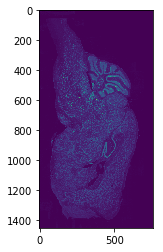

In [188]:
plt.imshow(DataManager.load_image_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn));

In [133]:
# Generate thumbnails - use Gimp

# def identify_shape(img_fp):
#     return map(int, check_output("identify -format %%Wx%%H \"%s\"" % img_fp, shell=True).split('x'))

# downsample = 32

# for fn in filenames_to_sections.keys()[:1]:
    
#     t = time.time()
    
#     raw_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='lossless', fn=fn)
#     tb_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn)
    
#     raw_shape = identify_shape(raw_fp)
#     new_width = raw_shape[0] / downsample
#     new_height = raw_shape[1] / downsample

#     cmd = """gimp -i -b '(script-fu-simple-scale "%(raw_fp)s" %(new_width)d %(new_height)d "%(tb_fp)s")' -b '(gimp-quit 0)'""" % \
#         {'new_width': new_width, 'new_height':new_height, 'raw_fp':raw_fp, 'tb_fp': tb_fp}
#     execute_command(cmd)
    
#     print time.time() - t

In [3]:
# Generate thumbnails - use skimage
# loading images is very slow.

img = imread('/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide20-S2-CFP.tif')
img_rescaled = rescale(img, scale=0.03125)

# Rotate raw

In [121]:
for version in ['Chat', 'Ntb']:
    for fn in filenames_to_sections.keys():
        
        t = time.time()
        
#         raw_fp = '/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_%(channel)s/%(fn)s_lossless_%(channel)s.tif' % dict(channel=channel, fn=fn)
#         rotated_raw_fp = '/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_%(channel)s/%(fn)s_lossless_%(channel)s.tif' % dict(channel=channel, fn=fn)
        
        in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='lossless', version=version, fn=fn)
        out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='lossless', version=version+'Rotated', fn=fn)
        create_parent_dir_if_not_exists(out_fp)
        
    #     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
    #         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

        # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
        cmd = """convert "%(in_fp)s" -flip -rotate 270 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
        execute_command(cmd)
        
        print time.time() - t

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide86_2018_02_13-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide86_2018_02_13-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide48_2018_01_22-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide48_2018_01_22-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide78_2018_02_14-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide78_2018_02_14-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide78_2018_02_14-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide07_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide07_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide07_2018_01_18-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide07_2018_01_18-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide49_2018_01_22-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide49_2018_01_22-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide76_2018_02_14-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide11_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide11_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide11_2018_01_18-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide11_2018_01_18-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide50_2018_01_22-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide50_2018_01_22-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide50_2018_01_22-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide92_2018_02_13-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide92_2018_02_13-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide92_2018_02_13-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide92_2018_02_13-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide28_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide28_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide28_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide66_2018_02_14-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide66_2018_02_14-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide74_2018_02_14-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide74_2018_02_14-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide74_2018_02_14-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide74_2018_02_14-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide74_2018_02_14-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide04_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide04_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide04_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide04_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide16_2018_01_18-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide16_2018_01_18-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide16_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide58_2018_01_22-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide58_2018_01_22-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide25_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide25_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide25_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide25_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide17_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide36_2018_01_22-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide36_2018_01_22-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide45_2018_01_22-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide45_2018_01_22-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide17_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide17_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide14_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide98_2018_02_13-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide98_2018_02_13-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide98_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide98_2018_02_13-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide12_2018_01_18-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide12_2018_01_18-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide12_2018_01_18-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide82_2018_02_14-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide82_2018_02_14-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide84_2018_02_14-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide84_2018_02_14-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide84_2018_02_14-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide84_2018_02_14-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide51_2018_01_22-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide08_2018_01_18-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide08_2018_01_18-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide08_2018_01_18-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide08_2018_01_18-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide08_2018_01_18-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide08_2018_01_18-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide86_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide15_2018_01_18-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide15_2018_01_18-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide76_2018_02_14-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide76_2018_02_14-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide33_2018_01_20-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide33_2018_01_20-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide33_2018_01_20-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide88_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide88_2018_02_13-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide13_2018_01_19-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide13_2018_01_19-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide13_2018_01_19-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide13_2018_01_19-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide13_2018_01_19-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide55_2018_01_22-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide55_2018_01_22-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide104_2018_02_13-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide55_2018_01_22-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide55_2018_01_22-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_N

KeyboardInterrupt: 

# Rotate thumbnails

In [189]:
# for fn in filenames_to_sections.keys():
for fn in ['CHATM2_slide48_2018_01_22-S3']:
    
    in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn)
    out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbRotated', resol='thumbnail', fn=fn)
    create_parent_dir_if_not_exists(out_fp)

#     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
#         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

    # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
    cmd = """convert "%(in_fp)s" -flip -rotate 270 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
    execute_command(cmd)
    
    upload_to_s3(tb_nt_fp)

convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide48_2018_01_22-S3_thumbnail_Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide48_2018_01_22-S3_thumbnail_Ntb.tif" 
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide48_2018_01_22-S3_thumbnail_Ntb.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide48_2018_01_22-S3_thumbnail_Ntb.tif"


# Remove artifact strip at the top of some images

In [190]:
for fn in filenames_to_sections.keys():
    
    tb_nt_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn)
    out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbStripRemoved', resol='thumbnail', fn=fn)
    create_parent_dir_if_not_exists(out_fp)

    img = imread(tb_nt_fp)
    img[:65, :] = 0
    imsave(out_fp, img)

# Convert thumbnail from 16-bit to 8-bit (stretch contrast)

In [ ]:
for fn in filenames_to_sections.keys():
    
    in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbStripRemoved', resol='thumbnail', fn=fn)
    
    out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbNormalized', resol='thumbnail', fn=fn)
    create_parent_dir_if_not_exists(out_fp)
    
    cmd = """convert "%(in_fp)s" -normalize -depth 8 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
    execute_command(cmd)
    
    upload_to_s3(out_fp)

In [48]:
stack = 'CHATM3'

In [49]:
for fn in filenames_to_sections.keys():
    
    in_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn)
    
    out_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='NtbNormalized', resol='thumbnail', fn=fn)
    create_parent_dir_if_not_exists(out_fp)
    
    cmd = """convert "%(in_fp)s" -normalize -depth 8 "%(out_fp)s" """ % {'in_fp': in_fp, 'out_fp': out_fp}
    execute_command(cmd)
    
    upload_to_s3(out_fp)

convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide66_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide66_2018_02_19-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide50_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide50_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide39_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide39_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S2_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide13_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide13_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S3_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide111_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide111_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumb

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide71_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide71_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide127_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide127_2018_01_26-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide19_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide19_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbna

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide26_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide26_2018_02_17-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide01_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide01_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide97_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide97_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S2_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide34_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide34_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide121_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide121_2018_01_26-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide03_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide03_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbna

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide93_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide93_2018_01_26-S2_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide10_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide10_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide113_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide113_2018_01_26-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide43_2018_02_19-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide43_2018_02_19-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbna

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S2_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide11_2018_02_17-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide11_2018_02_17-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide16_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide16_2018_02_17-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide105_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide105_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide125_2018_01_26-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide125_2018_01_26-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide52_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide52_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbna

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide09_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide09_2018_02_18-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide17_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide17_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide06_2018_02_17-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide06_2018_02_17-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide18_2018_02_17-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide18_2018_02_17-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide07_2018_02_18-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide07_2018_02_18-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide44_2018_02_19-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide44_2018_02_19-S1_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide73_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide73_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S2_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide107_2018_01_26-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide107_2018_01_26-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumb

0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif" "s3://mousebrainatlas-data/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S3_thumbnail_NtbNormalized.tif"
0
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_Ntb/CHATM3_slide51_2018_02_18-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_NtbNormalized/CHATM3_slide51_2018_02_18-S2_thumbnail_NtbNormalized.tif" 
0
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM3/CHATM3_thumbnail_N

In [9]:
# import re

In [52]:
# for fn in os.listdir(raw_dir):
    
#     s = re.search("Chat_(.*)-(Chat|Ntb).tif", fn)
#     section_name_minus_stack, channel = s.groups()[:2] 
#     new_filename = 'ChatCryoJane201710_' + section_name_minus_stack + '_lossless.tif'
    
#     if channel == 'Ntb': # neurotrace blue
#         raw_rotated_dir = raw_nt_dir
#     else: # Chat
#         raw_rotated_dir = raw_chat_dir
        
# #     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
# #         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

#     # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
#     cmd = """convert "%(raw_dir)s/%(fn)s" -flip -rotate 270 -compress LZW "%(raw_rotated_dir)s/%(new_filename)s" """ % \
#         {'fn':fn, 'raw_dir':raw_dir, 'new_filename': new_filename, 'raw_rotated_dir': raw_rotated_dir}
#     execute_command(cmd)

# Tune contrast

In [3]:
stack = 'ChatCryoJane201710'

In [10]:
# for fn in metadata_cache['valid_filenames'][stack]:
img = DataManager.load_image_v2(stack=stack, prep_id=2, section=100, version='Ntb')

In [13]:
display_image(img[10000:12000, 10000:12000])

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


/home/yuncong/Brain/preprocess/tmp.jpg

In [14]:
img[10000:12000, 10000:12000].max()

62776

In [19]:
2**16-1

65535

In [21]:
display_image(rescale_intensity_v2(img[10000:12000, 10000:12000], 65535, 0))

/home/yuncong/Brain/preprocess/tmp.jpg

# Transform and crop lossless CryoJane

In [5]:
prep_id = 2

In [6]:
stack = 'CHATM3'

In [7]:
_, sections_to_filenames = DataManager.load_sorted_filenames(stack=stack) 
valid_filenames = [fn for fn in sections_to_filenames.values() if not is_invalid(fn=fn)]

In [8]:
xmin, xmax, ymin, ymax, first_sec, last_sec = DataManager.load_cropbox(stack=stack)
w = xmax + 1 - xmin
h = ymax + 1 - ymin
x = xmin
y = ymin

print x,y,w,h

540 106 799 567


In [9]:
anchor_fn = DataManager.load_anchor_filename(stack=stack)
transforms_to_anchor = DataManager.load_transforms(stack=stack, downsample_factor=32, use_inverse=False, anchor_fn=anchor_fn)

In [10]:
# init_rotate = '-flip -rotate 270'
init_rotate = ''

In [11]:
script = os.path.join(REPO_DIR, 'preprocess', 'warp_crop_IM_v3.py')

In [12]:
pad_bg_color = 'black'

In [16]:
fns_not_yet_converted = [metadata_cache['sections_to_filenames']['CHATM2'][sec] for sec in range(12,70)]

In [17]:
for version in ['Ntb']:

    t = time.time()

    if pad_bg_color == 'auto': # useful for alternatively stained stacks where bg varies depending on stain on each section
        run_distributed('%(script)s %(stack)s \"%%(input_fp)s\" \"%%(output_fp)s\" %%(transform)s lossless %(x)d %(y)d %(w)d %(h)d %%(pad_bg_color)s -r \"%(init_rotate)s\"' % \
                        {'script': script,
                        'stack': stack,
                         'x': x,
                        'y': y,
                        'w': w,
                        'h': h,
                         'init_rotate': init_rotate,
                        },
                        kwargs_list=[{'transform': ','.join(map(str, transforms_to_anchor[fn].flatten())),
                                    'input_fp': DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='lossless', version=version, fn=fn),
                                      'output_fp': DataManager.get_image_filepath_v2(stack=stack, fn=fn, prep_id=prep_id, version=version, resol='lossless'),
                                    'pad_bg_color': 'black' if fn.split('-')[1][0] == 'F' else 'white'}
                                     for fn in fns_not_yet_converted
#                                     for fn in valid_filenames
#                                      for fn in ['CHATM2_slide14_2018_01_18-S3']
                                    ],
                        argument_type='single',
                       jobs_per_node=1,
                       local_only=True)
    else:
        run_distributed('%(script)s %(stack)s \"%%(input_fp)s\" \"%%(output_fp)s\" %%(transform)s lossless %(x)d %(y)d %(w)d %(h)d %(pad_bg_color)s -r \"%(init_rotate)s\"' % \
                        {'script': script,
                        'stack': stack,
                         'x': x,
                        'y': y,
                        'w': w,
                        'h': h,
                        'pad_bg_color': pad_bg_color,
                         'init_rotate': init_rotate
                        },
                        kwargs_list=[{'transform': ','.join(map(str, transforms_to_anchor[fn].flatten())),
                                    'input_fp': DataManager.get_image_filepath_v2(stack=stack, prep_id=None, resol='lossless', version=version, fn=fn),
                                      'output_fp': DataManager.get_image_filepath_v2(stack=stack, fn=fn, prep_id=prep_id, version=version, resol='lossless'),
                                     }
                                     for fn in fns_not_yet_converted
#                                     for fn in valid_filenames
#                                      for fn in ['CHATM2_slide14_2018_01_18-S3']
                                    ],
                        argument_type='single',
                       jobs_per_node=1,
                       local_only=True)

    # wait_qsub_complete()

    print 'done in', time.time() - t, 'seconds' # 300 seconds.

rm -f ~/stderr_*; rm -f ~/stdout_*
0


Run locally.


done in 8042.1418469 seconds


Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.
